In [32]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Getting the data
df = pd.DataFrame()
df = pd.read_csv("data/lending_train.csv")
pd.set_option('max_columns', None)

In [34]:
# Viewing the data
df

,ID,requested_amnt,loan_duration,employment,employment_length,race,reason_for_loan,extended_reason,annual_income,debt_to_income_ratio,employment_verified,public_bankruptcies,zipcode,state,home_ownership_status,delinquency_last_2yrs,fico_score_range_low,fico_score_range_high,fico_inquired_last_6mths,months_since_last_delinq,revolving_balance,total_revolving_limit,type_of_application,any_tax_liens,loan_paid
0,0,32000.0,60 months,SVP,4 years,W,debt_consolidation,Debt consolidation,250000.0,16.35,Verified,0.0,333xx,FL,RENT,0.0,775.0,779.0,0.0,NaN,22480.0,105700.0,Individual,0.0,1
1,1,6000.0,36 months,METAL FABRICATION SUPERVISOR,10+ years,B,home_improvement,Home improvement,70000.0,15.22,Source Verified,0.0,727xx,AR,MORTGAGE,0.0,650.0,654.0,1.0,30.0,6313.0,14600.0,Individual,0.0,1
2,2,4200.0,36 months,insurance collector specialist,10+ years,W,debt_consolidation,Debt consolidation,37000.0,20.99,Not Verified,0.0,146xx,NY,OWN,1.0,665.0,669.0,0.0,11.0,4482.0,10300.0,Individual,0.0,1
3,3,9725.0,36 months,Kitchen Manager,10+ years,W,debt_consolidation,Debt consolidation,45000.0,37.76,Source Verified,0.0,497xx,MI,OWN,0.0,705.0,709.0,0.0,NaN,21705.0,25200.0,Individual,0.0,1
4,4,24000.0,36 months,Appeals Specialist,10+ years,B,debt_consolidation,Debt consolidation,86000.0,32.10,Not Verified,0.0,550xx,MN,MORTGAGE,0.0,650.0,654.0,0.0,76.0,30406.0,104200.0,Individual,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,8000.0,36 months,Human Resources Analyst,2 years,W,home_improvement,Home improvement,71000.0,25.93,Verified,1.0,921xx,CA,MORTGAGE,1.0,665.0,669.0,2.0,17.0,14913.0,30800.0,Individual,0.0,1
999996,999996,4000.0,36 months,Support Manager,6 years,W,debt_consolidation,Debt consolidation,38000.0,13.33,Verified,0.0,330xx,FL,RENT,0.0,685.0,689.0,0.0,77.0,4813.0,8900.0,Individual,0.0,1
999997,999997,11000.0,60 months,software specialist,< 1 year,W,debt_consolidation,Debt consolidation,57500.0,9.41,Verified,0.0,633xx,MO,MORTGAGE,0.0,725.0,729.0,1.0,NaN,10834.0,13000.0,Individual,0.0,1
999998,999998,14400.0,36 months,QMS,1 year,W,credit_card,Credit card refinancing,48000.0,16.50,Not Verified,0.0,801xx,CO,RENT,0.0,690.0,694.0,1.0,NaN,15745.0,20600.0,Individual,0.0,1


In [35]:
# Columns, respective datatypes, and data distribution
print(df.dtypes)
print(df.describe())

ID                            int64
requested_amnt              float64
loan_duration                object
employment                   object
employment_length            object
race                         object
reason_for_loan              object
extended_reason              object
annual_income               float64
debt_to_income_ratio        float64
employment_verified          object
public_bankruptcies         float64
zipcode                      object
state                        object
home_ownership_status        object
delinquency_last_2yrs       float64
fico_score_range_low        float64
fico_score_range_high       float64
fico_inquired_last_6mths    float64
months_since_last_delinq    float64
revolving_balance           float64
total_revolving_limit       float64
type_of_application          object
any_tax_liens               float64
loan_paid                     int64
dtype: object
                   ID  requested_amnt  annual_income  debt_to_income_ratio  \
count  1

In [36]:
# Finding num of bad vals per col
for col in df.columns:
    print(col, ":", df[col].isnull().sum())

ID : 0
requested_amnt : 0
loan_duration : 0
employment : 63562
employment_length : 58152
race : 0
reason_for_loan : 0
extended_reason : 12425
annual_income : 0
debt_to_income_ratio : 278
employment_verified : 0
public_bankruptcies : 516
zipcode : 1
state : 0
home_ownership_status : 0
delinquency_last_2yrs : 0
fico_score_range_low : 0
fico_score_range_high : 0
fico_inquired_last_6mths : 1
months_since_last_delinq : 504309
revolving_balance : 0
total_revolving_limit : 50231
type_of_application : 0
any_tax_liens : 28
loan_paid : 0


In [37]:
# Finding correlation between # of missing values and loan_paid
missing_vals = df.isnull().sum(axis=1)
print("Missing values to loan paid correlation:", missing_vals.corr(df['loan_paid']))

Missing values to loan paid correlation: -0.009552097796678809


<AxesSubplot:>

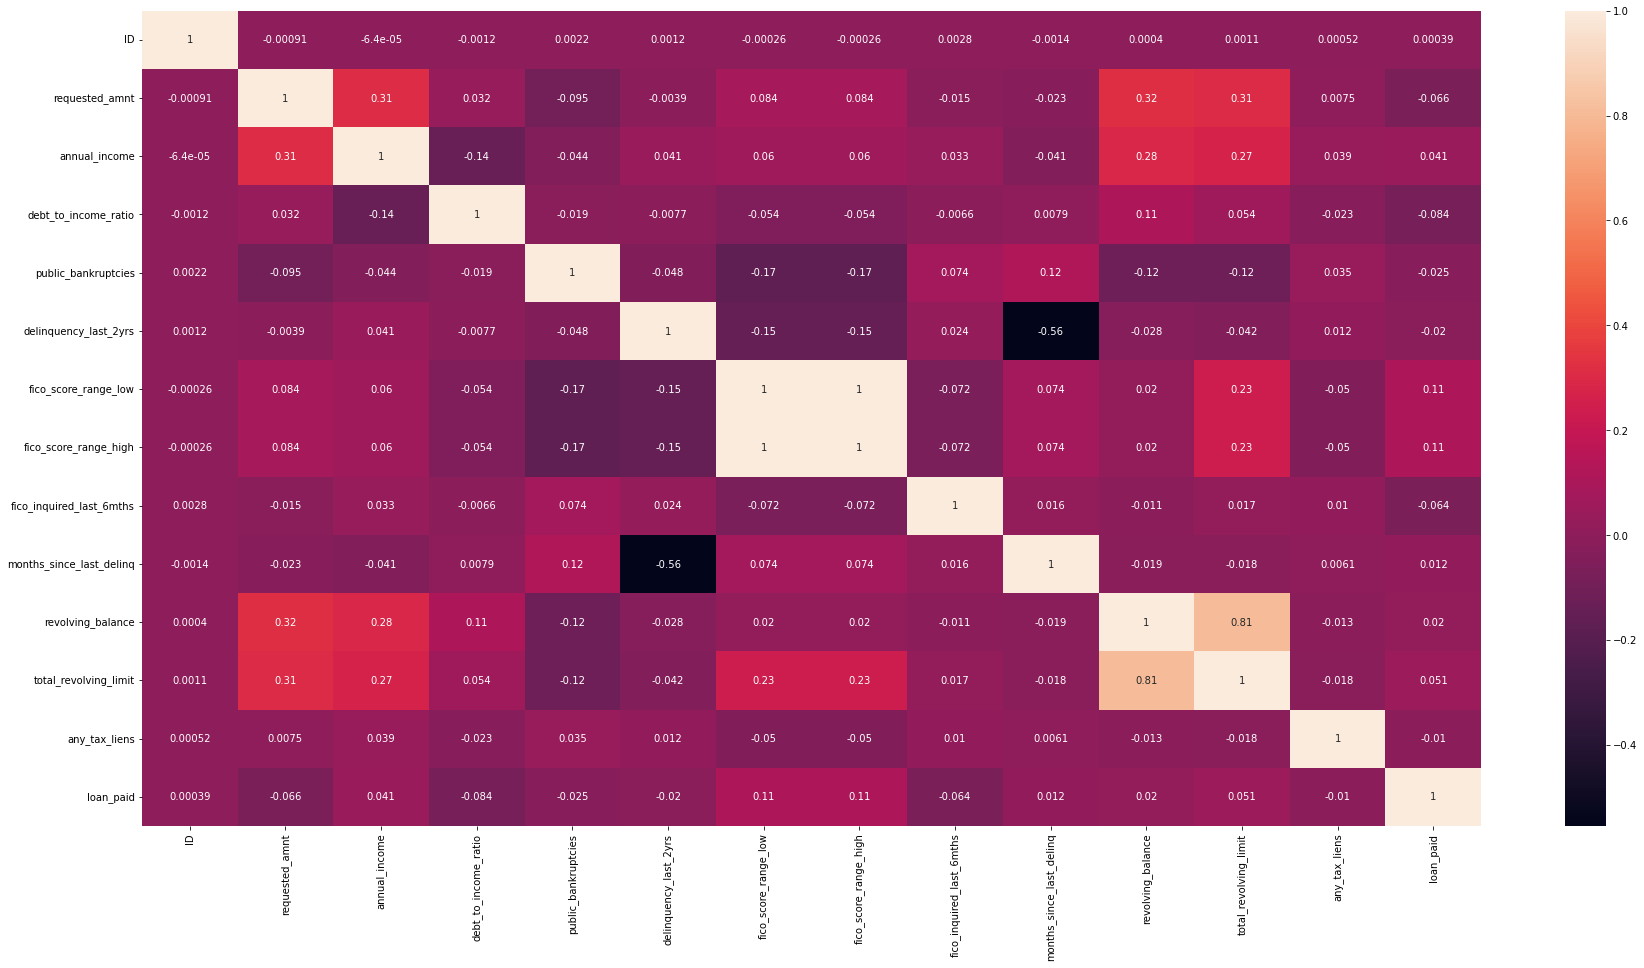

In [38]:
# Correlation matrix as a heat map
cor_matrix = df.corr()
plt.figure(figsize = (30, 15))
sns.heatmap(cor_matrix, annot=True)

In [39]:
# finding correlation between income_to_loan_amount and loan_paid
income_to_loan_amount_ratio = df['annual_income'] / df['requested_amnt']
print("Income to loan amount ratio to loan paid correlation:", income_to_loan_amount_ratio.corr(df['loan_paid']))

Income to loan amount ratio to loan paid correlation: 0.06383928867942633


In [40]:
# finding most common emplyments and reason for loans
top_five_employment = df['employment'].value_counts()[:5]
top_five_reason = df['reason_for_loan'].value_counts()[:5]
print("Top 5 Most Common Jobs:\n", top_five_employment, '\n')
print("Top 5 Most Common Reasons for Jobs:\n", top_five_reason, '\n')

Top 5 Most Common Jobs:
 Teacher             15912
Manager             14525
Owner                7651
Registered Nurse     6550
RN                   6369
Name: employment, dtype: int64 

Top 5 Most Common Reasons for Jobs:
 debt_consolidation    579969
credit_card           219631
home_improvement       65158
other                  57834
major_purchase         21833
Name: reason_for_loan, dtype: int64 



In [41]:
# analyzing home ownsership data to find ordinality
home_ownerships_status_vals = set(df['home_ownership_status'])
for home_ownerships_status_val in home_ownerships_status_vals:
    subset = df[df['home_ownership_status'] == home_ownerships_status_val]['loan_paid']
    print(home_ownerships_status_val, "\tNum of Examples:", subset.shape[0], "\tMean:", subset.mean())

ANY 	Num of Examples: 221 	Mean: 0.8280542986425339
OTHER 	Num of Examples: 105 	Mean: 0.819047619047619
NONE 	Num of Examples: 33 	Mean: 0.8787878787878788
RENT 	Num of Examples: 397016 	Mean: 0.7673998025268502
OWN 	Num of Examples: 107756 	Mean: 0.7924291918779465
MORTGAGE 	Num of Examples: 494869 	Mean: 0.8275179896093714


In [42]:
# finding good ordinality in states columns
values = set(df['state'])
values_avg = {}
for value in values:
    values_avg[value] = df[df['state'] == value]['loan_paid'].mean()

values_avg = dict(sorted(values_avg.items(), key=lambda item: item[1]))
print(values_avg)
print(list(x.keys()))

{'MS': 0.7362886597938144, 'IA': 0.75, 'NE': 0.7505643340857788, 'AR': 0.7590197413206263, 'AL': 0.7636055792953318, 'OK': 0.768117530972481, 'LA': 0.7685532397314031, 'NY': 0.7784901328644002, 'NV': 0.7807175786730808, 'TN': 0.7830331816082855, 'IN': 0.7837162837162838, 'MO': 0.784993058185031, 'NM': 0.7855976782151278, 'MD': 0.7857541300150183, 'SD': 0.785956416464891, 'FL': 0.7859624934933386, 'NJ': 0.7891722047660095, 'PA': 0.7898993476785029, 'KY': 0.7904662126767942, 'NC': 0.7914922543021716, 'OH': 0.7937885151914645, 'ND': 0.79766860949209, 'MI': 0.7978617029459273, 'VA': 0.8002953898090516, 'HI': 0.8007632054629443, 'TX': 0.8014569277402953, 'AZ': 0.8014850672792911, 'MN': 0.8026514515858365, 'AK': 0.8031693077564637, 'CA': 0.8039419655078018, 'ID': 0.80398406374502, 'DE': 0.8042385057471264, 'MA': 0.8062779490296531, 'GA': 0.8147246919357355, 'IL': 0.817751203603044, 'WI': 0.81787072243346, 'RI': 0.8222579903426075, 'CT': 0.8250016911317053, 'KS': 0.8291776552385519, 'UT': 0.8